# Imersão Dados da Alura

Análise exploratória de dados em cima de problema de _drug discovery_

## Importação de bibliotecas e leitura de base dados

In [1]:
# config inicial

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # config para printar todos os statements, nao apenas o último

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300) # setar nr de linhas mostradas
pd.set_option('display.max_columns', 50) # setar nr de colunas mostradas

sns.set() # carrega configs de exibicao padroes do seaborn

In [2]:
# Ler base de dados de interesse
dados = pd.read_csv("https://github.com/llrt/alura-imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true", 
            compression="zip") # como o arquivo é um CSV zipado, utilizar opção para tratamento automático da compressão

## Dados gerais da base de dados


In [3]:
dados.shape # dimensões da base de dados (nr de linhas, nr de colunas)

(23814, 877)

In [4]:
dados.info() # dados gerais das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [5]:
dados.head(n=6) # 6 primeiras linhas da base
dados.tail(n=6) # 6 últimas linhas da base

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,...,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,...,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,...,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,...,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,...,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,...,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,...,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,...,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,...,0.6498,0.8293,-0.7645,0.5379,0.5610,0.2577,-0.5493,0.2690,0.6392,-0.5774,-0.3393,0.5068,-0.2005,-0.4559,0.3734,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,...,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,...,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,...,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,...,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,...,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [6]:
print('Valores únicos para as principais colunas:\n')

print_valores = \
  lambda campo: print("%s: " % campo, dados[campo].unique(), 
                      "(%s valores)" % (len(dados[campo].unique())))

print_valores('id')
print_valores('tratamento')
print_valores('tempo')
print_valores('dose')
print_valores('droga')

Valores únicos para as principais colunas:

id:  ['id_000644bb2' 'id_000779bfc' 'id_000a6266a' ... 'id_fffc1c3f4'
 'id_fffcb9e7c' 'id_ffffdd77b'] (23814 valores)
tratamento:  ['com_droga' 'com_controle'] (2 valores)
tempo:  [24 72 48] (3 valores)
dose:  ['D1' 'D2'] (2 valores)
droga:  ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16'] (3289 valores)


O campo _id_ parece mesmo um identificador único da linha, daquele experimento.

O campo _tratamento_ indica se estamos lidando com um experimento que faz parte do grupo de controle (sem aplicação de composto ou com placebo) ou com aplicação de algum composto.

O campo _tempo_ indica por quanto tempo se aplicou aquela droga (ou placebo). Parece ser medido em horas (apenas valores 24, 48 e 72, todos múltiplos de 24).

O campo _dose_ identifica dois níveis de dosagem da droga, D1 e D2. Não é possível inferir qual dose é maior que a outra.

E os campos _g-*_ e _c-*_ ?

In [7]:
print_valores('g-0')
print_valores('c-0')

g-0:  [ 1.062   0.0743  0.628  ...  0.3942  0.666  -0.8598] (14367 valores)
c-0:  [-0.06    0.0927 -0.1312 ...  0.3509  0.9538 -2.389 ] (14421 valores)


Os campos _g-*_ e _c-*_ são ambos numéricos, com valores decimais. 

De acordo com a especialista, a semântica é:
* campos _g-*_: especificam a expressão gênica para um dado gene g-n, i.e. o grau de produção daquele gene g-n naquelas condições do experimento. Normalmente é um multiplicador (positivo) em cima do valor base (de controle), mas como os valores estão decimais e há valores negativos e positivos em torno de 0, há indícios de valores normalizados (e talvez truncados) - a conferir mais a frente.
* campos _c-*_: expressam o efeito relativo do experimento em cima de uma célula c-n. Também há valores negativos e positivos em torno de 0, indicando uma possível normalização dos valores - a conferir mais a frente

In [24]:
dados.describe() # estatísticas gerais de todas as colunas

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,...,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,...,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,...,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,...,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,...,-0.551200,-0.544150,-0.575075,-0.568275,-0.582650,-0.558575,-0.562375,-0.572800,-0.561225,-0.560675,-0.560100,-0.533700,-0.504575,-0.544275,-0.569150,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,0.038550,0.013800,0.060250,0.009800,-0.030100,0.000000,0.149400,-0.002200,0.000000,-0.027800,-0.002800,-0.069350,-0.011800,0.000000,...,-0.006900,0.018400,-0.014650,-0.014350,0.005300,-0.005300,-0.004050,0.003300,-0.007900,-0.004600,-0.002400,0.007850,-0.005600,-0.020600,-0.030000,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,0.525400,0.575275,0.604450,0.575825,0.457975,0.382475,0.829500,0.494775,0.327800,0.400600,0.492400,0.414875,0.433400,0.329250,...,0.456350,0.493400,0.448375,0.451975,0.463075,0.447675,0.462000,0.468900,0.452375,0.460475,0.461675,0.465950,0.463400,0.450075,0.430875,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,10.000000,10.000000,10.000000

Por fim, vamos renomear alguns campos para conveniência futura.


In [34]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

## Análise das colunas

### Coluna _tratamento_

Como estão distribuídos os experimentos em termos de com controle/com fármaco?

distribuição de valores em tratamento: 



com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64



distribuição de valores em tratamento (proporção): 



com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

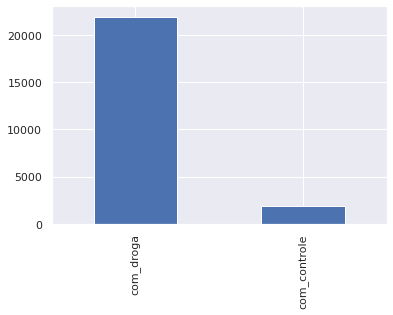

In [9]:
print('distribuição de valores em tratamento: \n')
dados['tratamento'].value_counts()
print('\n')
print('distribuição de valores em tratamento (proporção): \n')
dados['tratamento'].value_counts(normalize=True)

dados['tratamento'].value_counts().plot.bar()

A coluna _tratamento_ indica se o experimento em questão se refere a um grupo de controle (_com_controle_ ) ou de teste (_com_droga_). Note que a proporcao é muito desbalanceada (92% com droga). Por quê?

In [10]:
pd.crosstab(dados.composto, [dados.tempo, dados.dose])

tempo     24    48    72   
dose      D1 D2 D1 D2 D1 D2
composto                   
00199ff52  1  1  1  1  1  1
00251fc41  1  1  1  1  1  1
00321ea80  2  2  2  2  2  2
0034c0847  1  1  1  1  1  1
0060e686f  1  1  1  1  1  1
...       .. .. .. .. .. ..
ff9565933  1  1  1  1  1  1
ffd66e220  1  1  1  1  1  1
ffe357f8f  0  0  1  0  0  0
ffed8e1c9  1  1  1  1  1  1
fff7d208d  1  1  1  1  1  1

[3289 rows x 6 columns]

Cada composto foi portanto testado, em média, 6 vezes, 1 vez para cada combinação de tempo x dose. 
Quantos experimentos de controle foram feitos?

In [11]:
com_controle = dados.query('tratamento=="com_controle"')
pd.crosstab(com_controle.composto, [com_controle.tempo, com_controle.dose])

tempo       24        48        72     
dose        D1   D2   D1   D2   D1   D2
composto                               
cacb2b860  301  305  343  305  307  305

Proporcionalmente tivemos bem menos experimentos totais de controle por combinação de tempo x dose. Foram feitos provavelmente apenas o nr suficiente de experimentos para termos depois significância estatística nos demais campos _g-*_ e _c-*_ . O efeito ao final é que a coluna _tratamento_ fica bem desbalanceada (92% dos experimentos com droga, 8% com controle).

### Coluna _composto_

A coluna _composto_ (antiga _droga_) identifica de maneira única a droga/fármaco (ou controle) testado naquele experimento. Quantas são as drogas testadas?

In [12]:
print('qtd de compostos únicos:\n')
print_valores('composto')

print('distribuição de valores em composto: \n')
dados['composto'].value_counts()
print('\n')
print('distribuição de valores em composto (proporção): \n')
dados['composto'].value_counts(normalize=True)

qtd de compostos únicos:

composto:  ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16'] (3289 valores)
distribuição de valores em composto: 



cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
a90e40334       1
a16b60c44       1
89ced6383       1
b9ffc9444       1
a9bc2c549       1
Name: composto, Length: 3289, dtype: int64



distribuição de valores em composto (proporção): 



cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
a90e40334    0.000042
a16b60c44    0.000042
89ced6383    0.000042
b9ffc9444    0.000042
a9bc2c549    0.000042
Name: composto, Length: 3289, dtype: float64

Temos 3289 compostos, sendo que 1 deles - o mais comum, com id _cacb2b860_ - identifica na verdade os experimentos de controle, respondendo por 8% (1866) experimentos.

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Top 5 Compostos')

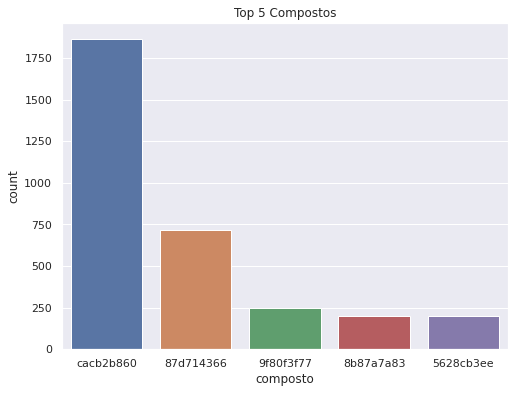

In [13]:
cod_compostos_mais_frequentes = dados['composto'].value_counts()[:5].index

plt.figure(figsize=(8,6))
ax = sns.countplot(x='composto', 
              data=dados.query('composto in @cod_compostos_mais_frequentes'), 
              order=cod_compostos_mais_frequentes)
ax.set_title('Top 5 Compostos')
plt.show(ax)

### Colunas dose e tempo

Como estão distribuídos os experimentos em termos de com controle/com fármaco?

distribuição de valores em dose: 



D1    12147
D2    11667
Name: dose, dtype: int64



distribuição de valores em dose (proporção): 



D1    0.510078
D2    0.489922
Name: dose, dtype: float64

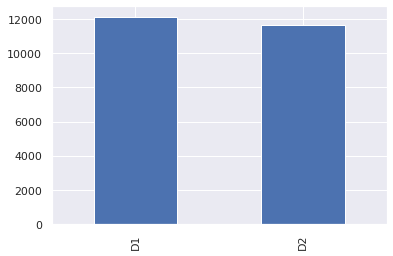

In [14]:
print('distribuição de valores em dose: \n')
dados['dose'].value_counts()
print('\n')
print('distribuição de valores em dose (proporção): \n')
dados['dose'].value_counts(normalize=True)

dados['dose'].value_counts().plot.bar()

Em termos de _dose_, as amostras estão bem balanceadas entre D1 e D2. E em termos de tempo?

distribuição de valores em dose: 



48    8250
72    7792
24    7772
Name: tempo, dtype: int64



distribuição de valores em tempo (proporção): 



48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

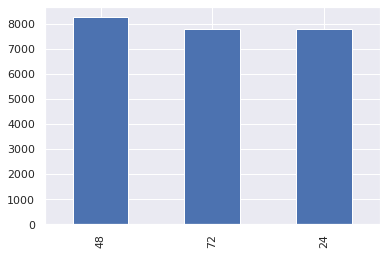

In [16]:
print('distribuição de valores em dose: \n')
dados['tempo'].value_counts()
print('\n')
print('distribuição de valores em tempo (proporção): \n')
dados['tempo'].value_counts(normalize=True)

dados['tempo'].value_counts().plot.bar()

Em termos de _tempo_, as amostras estão bem balanceadas entre seus valores possíveis (24, 48 e 72).

Mas considerando conjuntamente ambos os campos, as amostras seguem balanceadas?

In [17]:
pd.crosstab(dados.tempo, dados.dose)

dose,D1,D2
tempo,,
24,3886,3886
48,4354,3896
72,3907,3885


Sim, as amostras estão razoavelmente bem balanceadas quando consideramos conjuntamente _dose_ e _tempo_ - há ligeiramente menos experimentos com doses D2 para 48 h do que com dose D1, mas nada impactante.

### Colunas _g-*_

As colunas _g-*_ são numéricas contínuas, não categóricas. Vamos então olhar a distribuição de seus valores.

In [44]:
dados.loc[:, dados.columns.str.startswith("g")].describe().T

,count,mean,std,min,25%,50%,75%,max
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g-767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g-768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g-769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g-770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


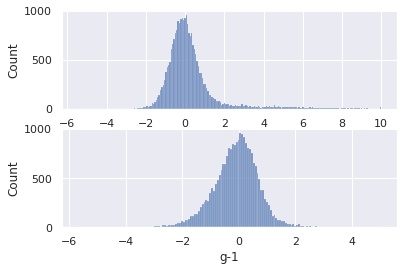

In [43]:
fig, ax = plt.subplots(2,1)

sns.histplot(data=dados, x="g-0", ax=ax[0])
sns.histplot(data=dados, x="g-1", ax=ax[1])

Como está a distribuição das médias? Os valores orbitam mesmo em torno de 0 em todos os _g-*_?

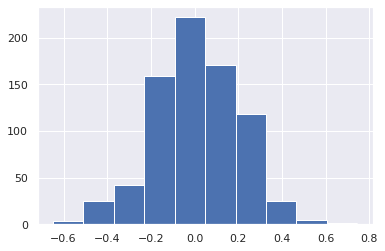

In [46]:
dados.loc[:, dados.columns.str.startswith("g")].describe().T['mean'].hist()

Sim, a maioria está em torno de 0.0 ou muito próximo disso. Mas e o min e max dos _g-*_ ?

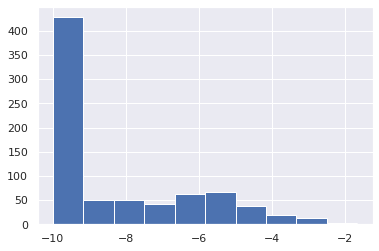

In [50]:
dados.loc[:, dados.columns.str.startswith("g")].describe().T['min'].hist()

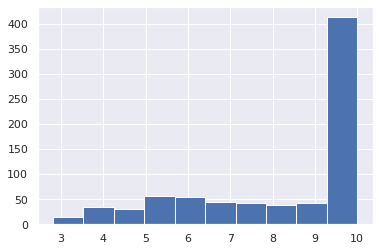

In [49]:

dados.loc[:, dados.columns.str.startswith("g")].describe().T['max'].hist()

Os valores possuem frequência muito alta de mínimos em -10 e máximo em +10, indicando que provavelmente no processo de normalização ocorreu um truncamento nestes pontos.

### Colunas c-*

As colunas g-* são numéricas contínuas, não categóricas. Vamos então olhar a distribuição de seus valores.

In [51]:
dados.loc[:, dados.columns.str.startswith("c")].describe().T

,count,mean,std,min,25%,50%,75%,max
c-0,23814.0,-0.355156,1.752565,-10.000,-0.549300,-0.00900,0.448975,3.365
c-1,23814.0,-0.455359,2.004962,-10.000,-0.538425,0.00980,0.476875,3.915
c-2,23814.0,-0.480542,2.039346,-10.000,-0.550375,-0.00400,0.460575,2.970
c-3,23814.0,-0.377666,1.554583,-10.000,-0.601975,-0.03905,0.413100,2.408
c-4,23814.0,-0.493552,2.091888,-10.000,-0.559975,0.01140,0.470300,4.555
c-5,23814.0,-0.446037,1.893484,-10.000,-0.578775,-0.00890,0.442675,3.614
c-6,23814.0,-0.574855,2.234152,-10.000,-0.571250,0.00740,0.459475,3.904
c-7,23814.0,-0.266293,1.465313,-10.000,-0.524275,0.00635,0.469375,4.918
c-8,23814.0,-0.451307,1.948829,-10.000,-0.551100,-0.00535,0.453175,3.648
c-9,23814.0,-0.458664,1.646122,-10.000,-0.654675,-0.02535,0.424400,3.194


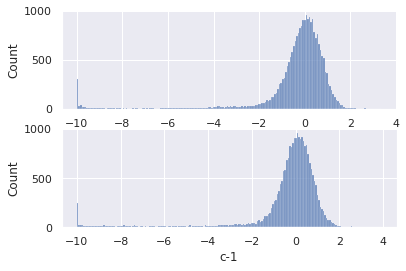

In [52]:
fig, ax = plt.subplots(2,1)

sns.histplot(data=dados, x="c-0", ax=ax[0])
sns.histplot(data=dados, x="c-1", ax=ax[1])

Como está a distribuição das médias? Os valores orbitam também em torno de 0 em todos os c-*?

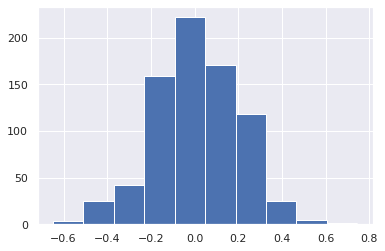

In [53]:
dados.loc[:, dados.columns.str.startswith("g")].describe().T['mean'].hist()

Sim, a maioria está em torno de 0.0 ou muito próximo disso. Mas e o min e max dos c-* ?

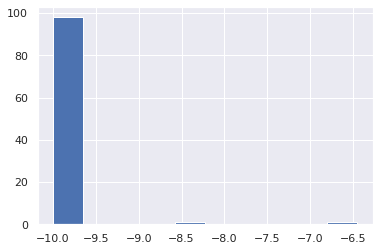

In [54]:
dados.loc[:, dados.columns.str.startswith("c")].describe().T['min'].hist()

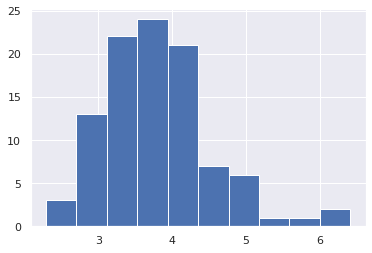

In [55]:
dados.loc[:, dados.columns.str.startswith("c")].describe().T['max'].hist()

Em termos de min, a maioria dos valores está em -10, revelando um possível truncamento.

Em termos de max, os c-* variam bastante, chegando até +6

## Análises multivariadas (de várias colunas conjuntamente)

In [61]:
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Olhando _tratamento_, a proporção de _com_droga_ vs _com_controle_ é homogênea entre os valores de _dose_ e _tempo_ (cerca de 92% para com droga, 8% por tratamento). 

Por outro lado, os experimentos com controle estão balanceados entre doses e tempos?

In [62]:
pd.crosstab([dados.dose, dados.tempo], dados.tratamento, normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Sim, a classe com controle está bem homogênea entre combinações de doses e tempos. O mesmo vale para a classe com droga.

## Conclusões

* A base registra diversos experimentos com fármacos, num total de 23813 experimentos, com um total de 877 colunas de informações
* Além de colunas de id do experimento (campo *id*), temos colunas que informam: 
** Se se trata de experimento do grupo de controle (sem uso de fármaco ou placebo) ou com uso de fármaco - campo *tratamento*
** Qual o tempo de uso do fármaco - campo *tempo*
** O tipo de dose aplicada (D1 ou D2, a investigar o que significam) - campo *dose*
** O id do fármaco investigado - campo *composto* (originalmente *droga*)
** A expressão gênica naquele experimento - campos *g-\**

## Dúvidas

* O que significam as doses D1 e D2? São doses de tamanhos diferentes?
* Os campos *g-\** estão com dados normalizados?
* O que são os campos *c-\** ?